In [81]:
!pip install dash
!pip install dash jupyter-dash
!pip install scipy

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [83]:
# Chargement du dataset
df_clean = pd.read_csv("data/heart_2022_clean.csv")

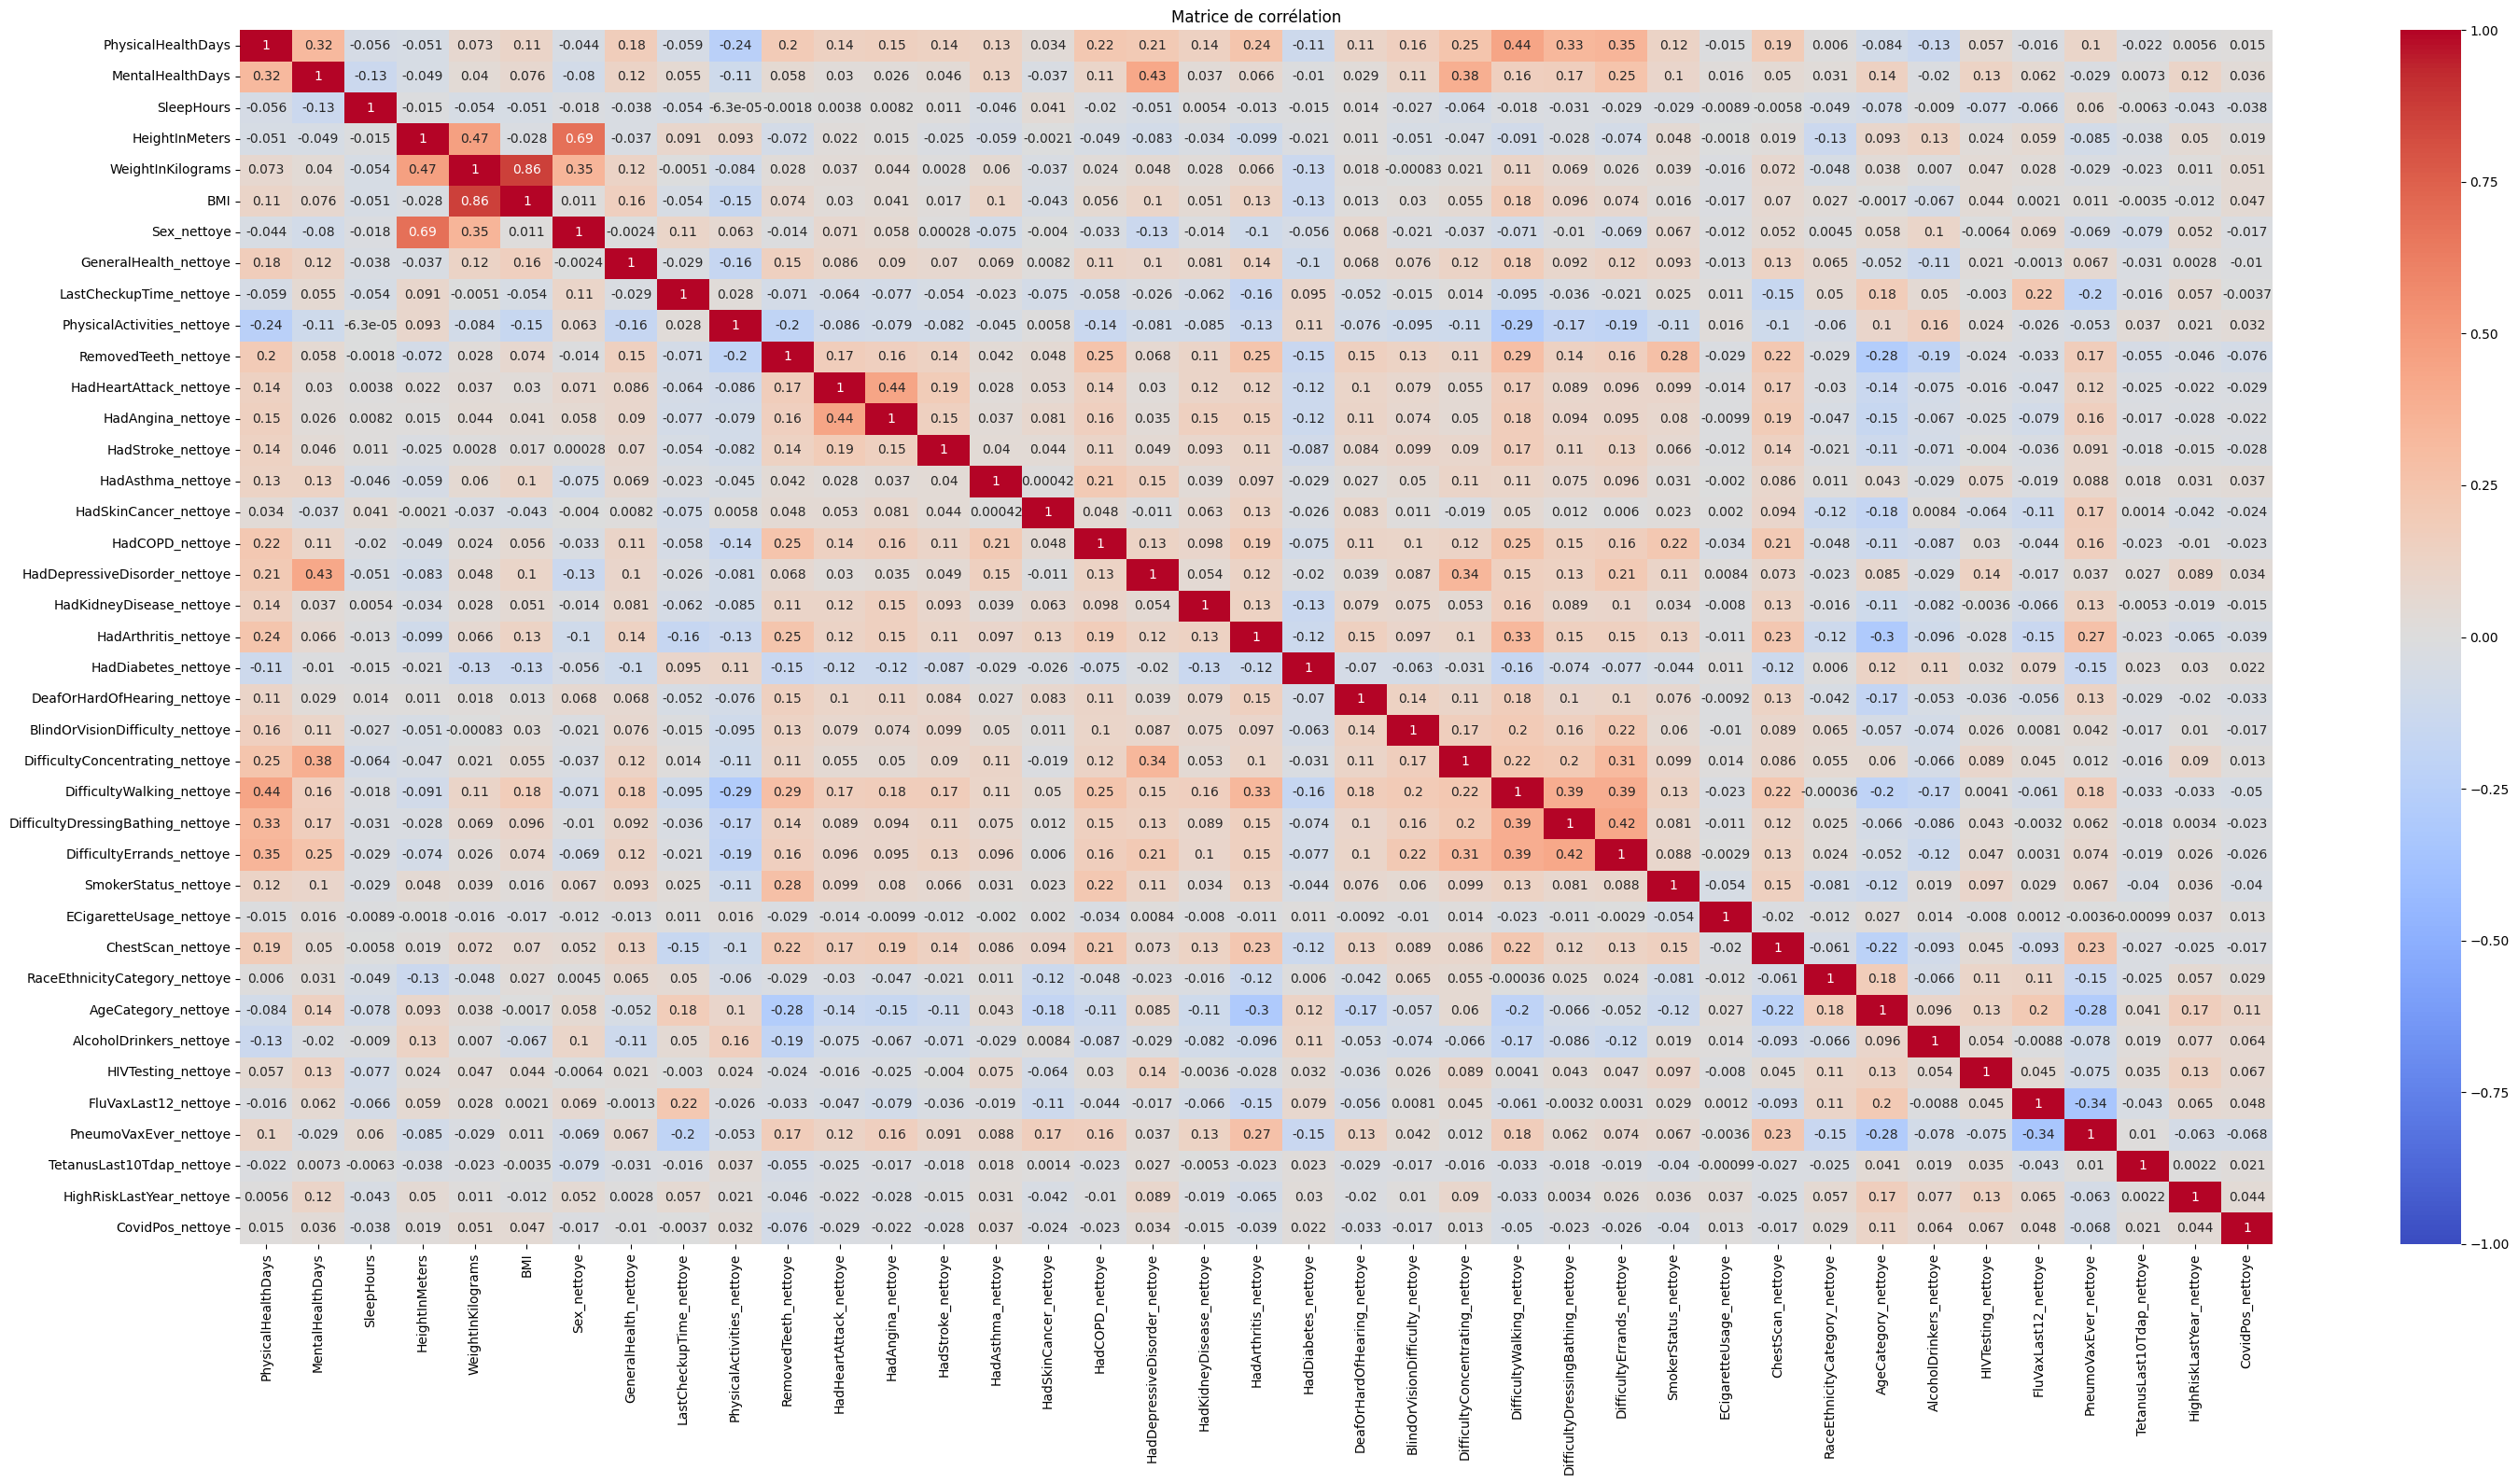

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

corr_matrix = df_clean[numeric_columns].corr()

# Création du heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matrice de corrélation')
plt.tight_layout()
plt.show()

# Hypothèse 1 :Les hommes qui effectuent régulièrement des activités physiques ont moins de crise cardiaque que les femmes #


Modalités de HadHeartAttack : ['No' 'Yes' nan]

Comptage brut :
 HadHeartAttack      No    Yes
Sex                          
Female          224828   9691
Male            192131  15417


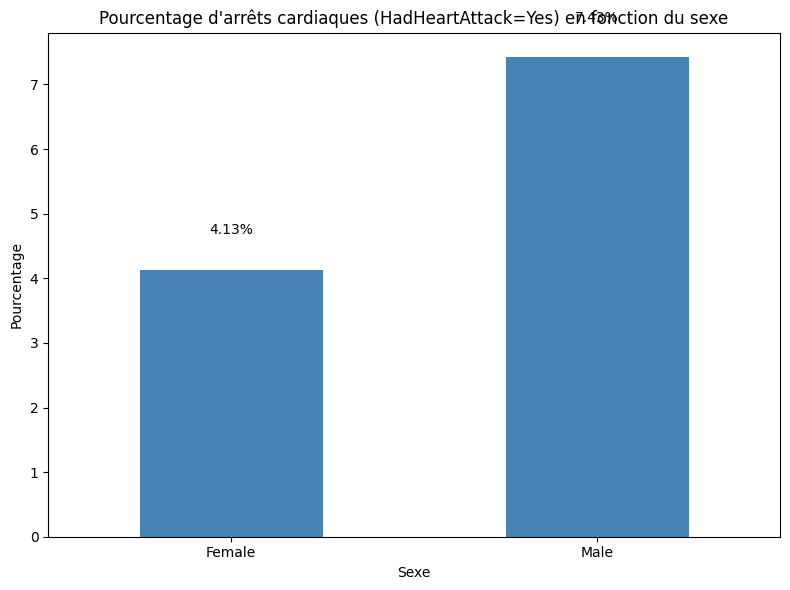

In [85]:
# Vérifions les modalités de HadHeartAttack
print("\nModalités de HadHeartAttack :", df_clean['HadHeartAttack'].unique())

# Groupement : % de HadHeartAttack='Yes' par sexe
result = df_clean.groupby('Sex')['HadHeartAttack'].value_counts(normalize=True).unstack()

# Comptage brut pour info
print("\nComptage brut :\n", df_clean.groupby('Sex')['HadHeartAttack'].value_counts().unstack())

# Proportion de 'Yes' en %
result_yes = result['Yes'] * 100

# Plot
plt.figure(figsize=(8, 6))
result_yes.plot(kind='bar', color='steelblue')
plt.title('Pourcentage d\'arrêts cardiaques (HadHeartAttack=Yes) en fonction du sexe')
plt.xlabel('Sexe')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)

# Ajout des annotations
for i, v in enumerate(result_yes):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Hypothèse 2 : Les crises cardiaques sont plus fréquentes chez les fumeurs de cigarette que chez les vapoteurs


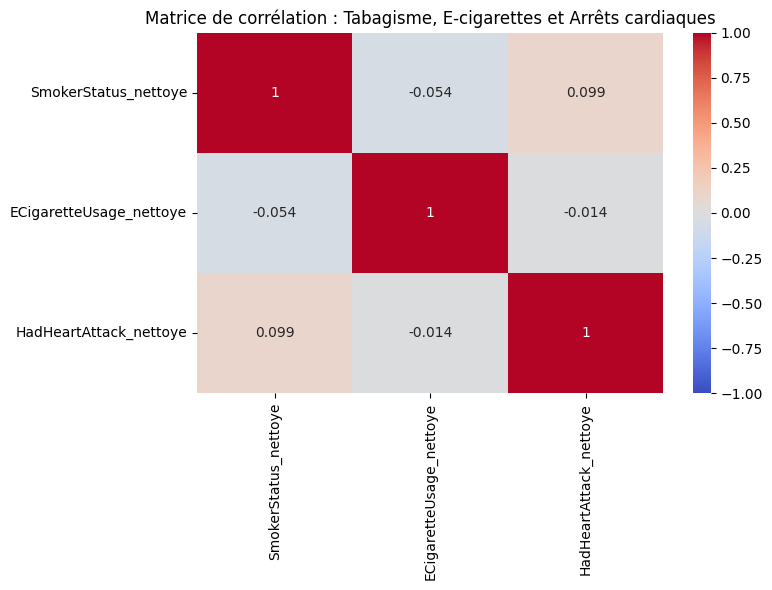

In [86]:

# On sélectionne les colonnes codées (_nettoye)
columns_for_correlation = [
    'SmokerStatus_nettoye',
    'ECigaretteUsage_nettoye',
    'HadHeartAttack_nettoye'
]

# Matrice de corrélation
correlation_matrix = df_clean[columns_for_correlation].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    center=0
)
plt.title('Matrice de corrélation : Tabagisme, E-cigarettes et Arrêts cardiaques')
plt.tight_layout()
plt.show()



Comptage brut :
 HadHeartAttack                             No   Yes
SmokerStatus                                       
Current smoker - now smokes every day   32504  3178
Current smoker - now smokes some days   12844   978
Former smoker                          103246  9763
Never smoked                           235308  9305

Comptage brut :
 HadHeartAttack                                 No    Yes
ECigaretteUsage                                         
Never used e-cigarettes in my entire life  292103  18030
Not at all (right now)                      70479   4328
Use them every day                          10003    324
Use them some days                          11200    457


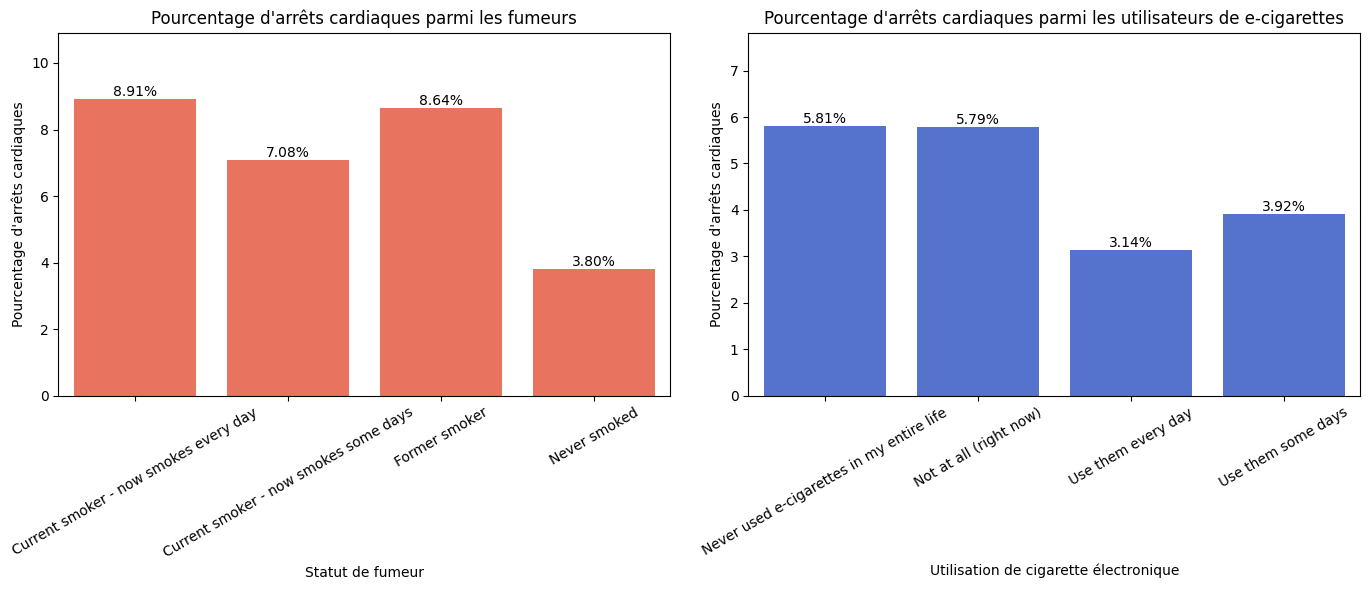

In [87]:
def calculate_heart_attack_percentage_within_group(data, group_column, target_column):
    """
    Calcule le pourcentage de Yes dans target_column pour chaque modalité de group_column
    """
    grouped = data.groupby(group_column)[target_column].value_counts(normalize=True).unstack()
    print("\nComptage brut :\n", data.groupby(group_column)[target_column].value_counts().unstack())
    return (grouped['Yes'] * 100).reset_index(name='Yes')

# On utilise ici les colonnes brutes (si elles sont nettoyées et contiennent Yes/No) ou sinon prendre les _nettoye

smoking_data = calculate_heart_attack_percentage_within_group(df_clean, 'SmokerStatus', 'HadHeartAttack')
ecigarette_data = calculate_heart_attack_percentage_within_group(df_clean, 'ECigaretteUsage', 'HadHeartAttack')

plt.figure(figsize=(14, 6))

# 🔷 Tabac
ax1 = plt.subplot(121)
sns.barplot(
    x='SmokerStatus',
    y='Yes',
    data=smoking_data,
    ax=ax1,
    color='tomato'  # couleur rouge pour le tabac
)
ax1.set_title('Pourcentage d\'arrêts cardiaques parmi les fumeurs')
ax1.set_xlabel('Statut de fumeur')
ax1.set_ylabel('Pourcentage d\'arrêts cardiaques')
ax1.set_ylim(0, smoking_data['Yes'].max() + 2)
ax1.tick_params(axis='x', rotation=30)

# 🔷 Cigarette électronique
ax2 = plt.subplot(122)
sns.barplot(
    x='ECigaretteUsage',
    y='Yes',
    data=ecigarette_data,
    ax=ax2,
    color='royalblue'  # couleur bleue pour la e-cigarette
)
ax2.set_title('Pourcentage d\'arrêts cardiaques parmi les utilisateurs de e-cigarettes')
ax2.set_xlabel('Utilisation de cigarette électronique')
ax2.set_ylabel('Pourcentage d\'arrêts cardiaques')
ax2.set_ylim(0, ecigarette_data['Yes'].max() + 2)
ax2.tick_params(axis='x', rotation=30)

# Ajout des labels sur les barres
for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()


Grouped data for SmokerStatus:
HadHeartAttack                             No   Yes
SmokerStatus                                       
Current smoker - now smokes every day   15262  1700
Current smoker - now smokes some days    6055   586
Former smoker                           70941  7416
Never smoked                           197973  8221
Grouped data for ECigaretteUsage:
HadHeartAttack                                 No   Yes
ECigaretteUsage                                        
Never used e-cigarettes in my entire life  197973  8221
Not at all (right now)                      29654   940
Use them every day                           2347    24
Use them some days                           3830    45


/var/folders/2t/k0jf_rys24b897yq6hss2w200000gn/T/ipykernel_48115/2175318646.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SmokerStatus', y='Yes', data=smoking_data, ax=ax1, palette='Reds')
/var/folders/2t/k0jf_rys24b897yq6hss2w200000gn/T/ipykernel_48115/2175318646.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ECigaretteUsage', y='Yes', data=ecigarette_data, ax=ax2, palette='Blues')


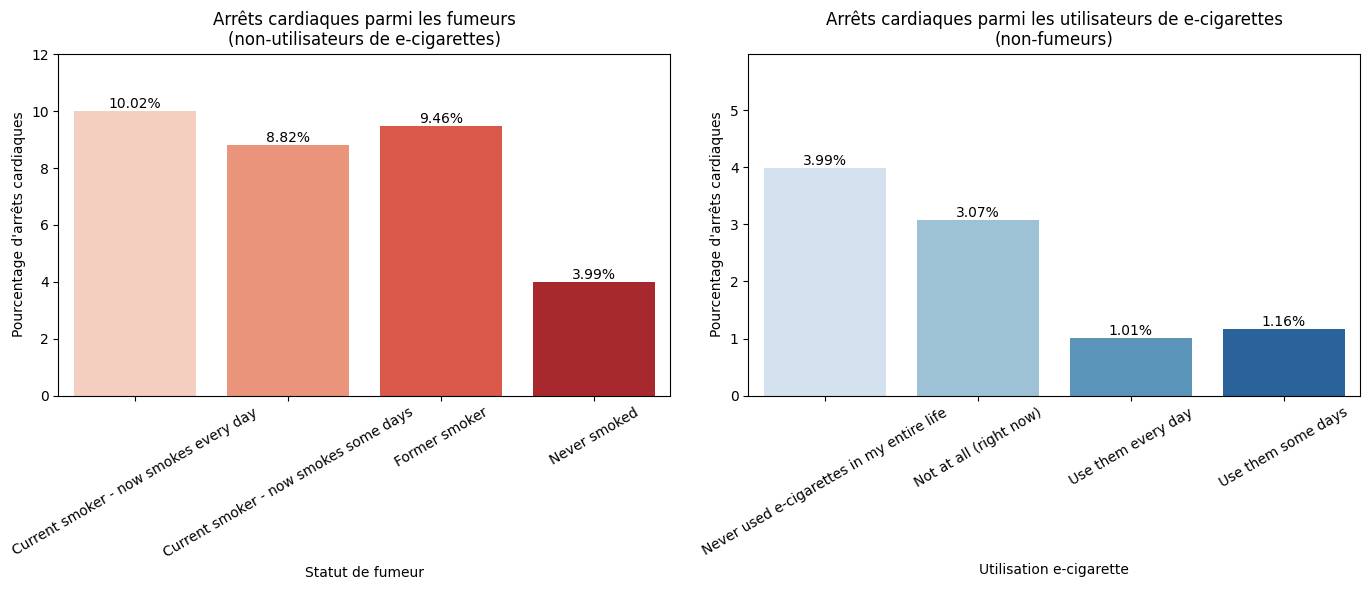

In [88]:
def calculate_heart_attack_percentage_within_group(data, group_column, target_column, filter_column=None, filter_values=None):
    """
    Calcule le % de 'Yes' dans target_column pour chaque modalité de group_column,
    éventuellement filtré par filter_column ∈ filter_values.
    """
    if filter_column and filter_values:
        data = data[data[filter_column].isin(filter_values)]

    grouped = data.groupby(group_column)[target_column].value_counts(normalize=True).unstack()
    print(f"Grouped data for {group_column}:")
    print(data.groupby(group_column)[target_column].value_counts().unstack())
    return (grouped['Yes'] * 100).reset_index(name='Yes')

# 🔷 Fumeurs (non-vapoteurs)
smoking_data = calculate_heart_attack_percentage_within_group(
    df_clean, 'SmokerStatus', 'HadHeartAttack',
    'ECigaretteUsage', ['Never used e-cigarettes in my entire life']
)

# 🔷 Vapoteurs (non-fumeurs)
ecigarette_data = calculate_heart_attack_percentage_within_group(
    df_clean, 'ECigaretteUsage', 'HadHeartAttack',
    'SmokerStatus', ['Never smoked']
)

plt.figure(figsize=(14, 6))

# 🔷 Tabac
ax1 = plt.subplot(121)
sns.barplot(x='SmokerStatus', y='Yes', data=smoking_data, ax=ax1, palette='Reds')
ax1.set_title('Arrêts cardiaques parmi les fumeurs\n(non-utilisateurs de e-cigarettes)')
ax1.set_xlabel('Statut de fumeur')
ax1.set_ylabel('Pourcentage d\'arrêts cardiaques')
ax1.set_ylim(0, smoking_data['Yes'].max() + 2)
ax1.tick_params(axis='x', rotation=30)

# 🔷 E-cigarette
ax2 = plt.subplot(122)
sns.barplot(x='ECigaretteUsage', y='Yes', data=ecigarette_data, ax=ax2, palette='Blues')
ax2.set_title('Arrêts cardiaques parmi les utilisateurs de e-cigarettes\n(non-fumeurs)')
ax2.set_xlabel('Utilisation e-cigarette')
ax2.set_ylabel('Pourcentage d\'arrêts cardiaques')
ax2.set_ylim(0, ecigarette_data['Yes'].max() + 2)
ax2.tick_params(axis='x', rotation=30)

# 🔷 Ajout des labels
for ax in [ax1, ax2]:
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f%%')

plt.tight_layout()
plt.show()


# Hypothèse 3 : Le diabète est la pathologie la plus associée aux crises cardiaques. #

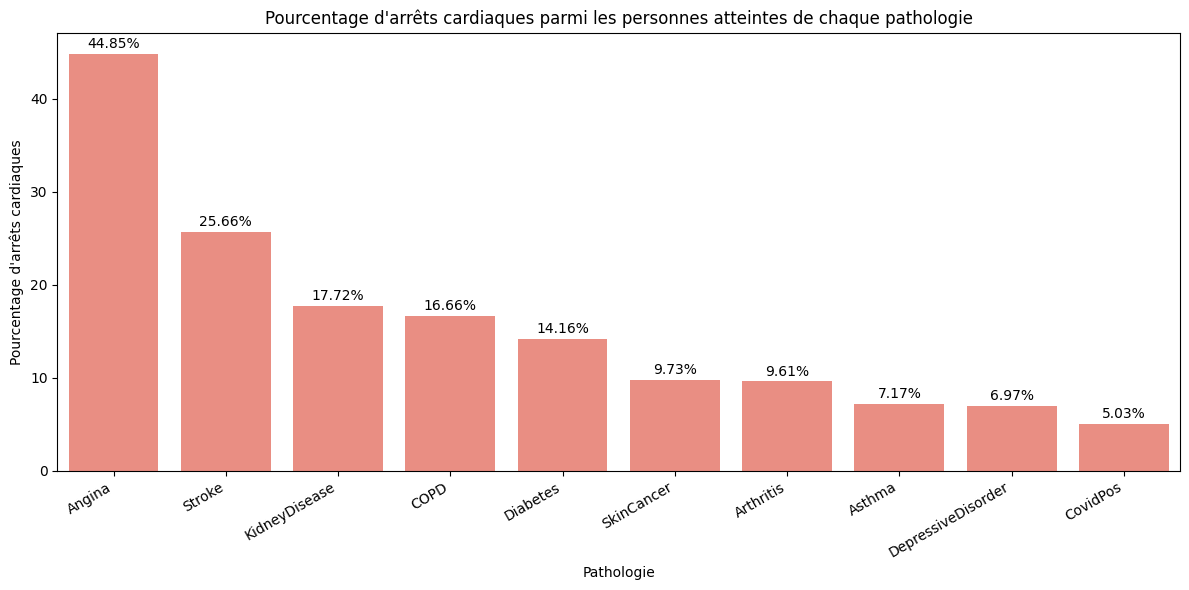

In [89]:
# Liste des pathologies à analyser
pathologies = [
    'HadDepressiveDisorder', 'HadDiabetes', 'HadAngina', 'HadStroke',
    'HadAsthma', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis',
    'HadSkinCancer', 'CovidPos'
]

def calculate_heart_attack_percentage(data, condition):
    """
    Calcule le pourcentage de 'Yes' dans HadHeartAttack
    parmi ceux qui ont la pathologie condition='Yes'
    """
    condition_data = data[data[condition] == 'Yes']
    total = len(condition_data)
    heart_attacks = len(condition_data[condition_data['HadHeartAttack'] == 'Yes'])
    return (heart_attacks / total) * 100 if total > 0 else 0

# Calcul des pourcentages pour chaque pathologie
percentages = [calculate_heart_attack_percentage(df_clean, path) for path in pathologies]

# Préparation des données pour le graphique
plot_data = pd.DataFrame({
    'Pathologie': [path.replace('Had', '') for path in pathologies],
    'Pourcentage d\'arrêts cardiaques': percentages
}).sort_values(by='Pourcentage d\'arrêts cardiaques', ascending=False)

# Visualisation
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Pathologie',
    y='Pourcentage d\'arrêts cardiaques',
    data=plot_data,
    color='salmon'
)
plt.title('Pourcentage d\'arrêts cardiaques parmi les personnes atteintes de chaque pathologie')
plt.xlabel('Pathologie')
plt.ylabel('Pourcentage d\'arrêts cardiaques')
plt.xticks(rotation=30, ha='right')

# Ajout des valeurs sur les barres
for i, v in enumerate(plot_data['Pourcentage d\'arrêts cardiaques']):
    plt.text(i, v + 0.3, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Les personnes obèses sont plus souvent diabétiques

In [90]:
def obesity_class(bmi):
    """
    Retourne la classe d'obésité en fonction de l'IMC (BMI).
    """
    if pd.isna(bmi):
        return "Inconnu"
    elif bmi < 18.5:
        return "Maigreur"
    elif 18.5 <= bmi < 25:
        return "Poids normal"
    elif 25 <= bmi < 30:
        return "Surpoids"
    elif 30 <= bmi < 35:
        return "Obésité modérée"
    elif 35 <= bmi < 40:
        return "Obésité sévère"
    else:
        return "Obésité morbide"

# Application sur le dataset nettoyé
df_clean["ObesityClass"] = df_clean["BMI"].apply(obesity_class)


In [91]:
def diabetes_binary(val):
    """
    Retourne 1 si diabète présent, 0 sinon.
    Gère les cas "Yes, but only during pregnancy (female)".
    """
    if val in ["Yes", "Yes, but only during pregnancy (female)"]:
        return 1
    elif val == "No":
        return 0
    else:
        return None  # valeurs manquantes explicites

# Application sur le dataset nettoyé
df_clean["HadDiabetes_nettoye"] = df_clean["HadDiabetes"].apply(diabetes_binary)

# Supprimer les lignes avec ObesityClass ou HadDiabetes_nettoye manquant
df_clean = df_clean.dropna(subset=["ObesityClass", "HadDiabetes_nettoye"]).copy()


/var/folders/2t/k0jf_rys24b897yq6hss2w200000gn/T/ipykernel_48115/4218433518.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


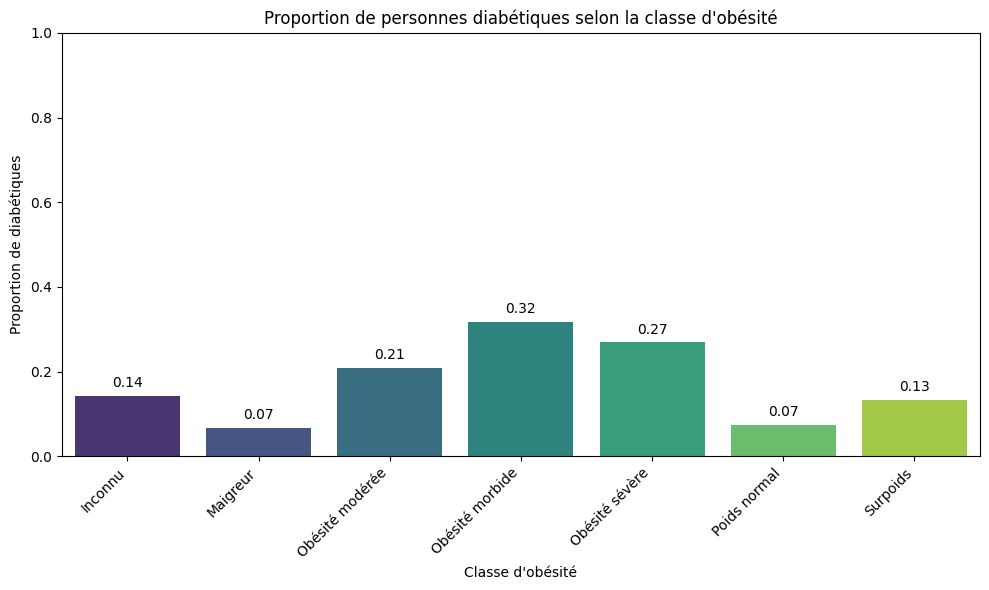

In [92]:
#  Calculer la proportion de diabétiques par classe d'obésité
prop_diabete = (
    df_clean.groupby("ObesityClass")["HadDiabetes_nettoye"]
    .mean()
    .reset_index(name="Proportion")
)

#  Barplot
plt.figure(figsize=(10,6))
sns.barplot(
    data=prop_diabete,
    x="ObesityClass",
    y="Proportion",
    palette="viridis"
)
plt.title("Proportion de personnes diabétiques selon la classe d'obésité")
plt.ylabel("Proportion de diabétiques")
plt.xlabel("Classe d'obésité")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

#  Ajout des étiquettes sur les barres
for i, v in enumerate(prop_diabete["Proportion"]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()


In [93]:
from scipy.stats import chi2_contingency
import pandas as pd

# Table de contingence
contingency_table = pd.crosstab(df_clean["ObesityClass"], df_clean["HadDiabetes_nettoye"])

print("\n Table de contingence :")
print(contingency_table)

# Test du χ²
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\n🔷 Résultat du test du χ² :")
print(f"  - χ² = {chi2:.2f}")
print(f"  - degrés de liberté = {dof}")
print(f"  - p-value = {p:.4e}")

if p < 0.05:
    print("✅ Il existe une association significative entre obésité et diabète.")
else:
    print("❌ Aucune preuve d'association significative entre obésité et diabète.")



 Table de contingence :
HadDiabetes_nettoye     0.0    1.0
ObesityClass                      
Inconnu               40602   6806
Maigreur               6219    450
Obésité modérée       59265  15636
Obésité morbide       14552   6771
Obésité sévère        22927   8434
Poids normal         106606   8615
Surpoids             118551  18282

🔷 Résultat du test du χ² :
  - χ² = 15989.19
  - degrés de liberté = 6
  - p-value = 0.0000e+00
✅ Il existe une association significative entre obésité et diabète.


# Les personnes qui ont plus de jours de mauvaise santé mentale déclarent plus souvent des difficultés à se concentrer.

/var/folders/2t/k0jf_rys24b897yq6hss2w200000gn/T/ipykernel_48115/3703540039.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean.groupby("MentalHealthCategory")["DifficultyConcentrating_nettoye"]
/var/folders/2t/k0jf_rys24b897yq6hss2w200000gn/T/ipykernel_48115/3703540039.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


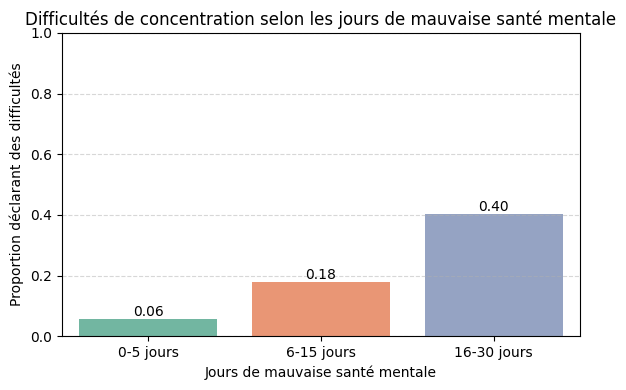

In [94]:
# Catégorisation des jours de mauvaise santé mentale
bins = [0, 5, 15, 31]
labels = ["0-5 jours", "6-15 jours", "16-30 jours"]
df_clean["MentalHealthCategory"] = pd.cut(
    df_clean["MentalHealthDays"], bins=bins, labels=labels, right=False
)

# Proportion de difficultés de concentration
agg_df = (
    df_clean.groupby("MentalHealthCategory")["DifficultyConcentrating_nettoye"]
    .mean()
    .reset_index()
)

# Visualisation
plt.figure(figsize=(6, 4))
ax = sns.barplot(
    data=agg_df,
    x="MentalHealthCategory",
    y="DifficultyConcentrating_nettoye",
    palette="Set2"
)
plt.title("Difficultés de concentration selon les jours de mauvaise santé mentale")
plt.ylabel("Proportion déclarant des difficultés")
plt.xlabel("Jours de mauvaise santé mentale")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Étiquettes au-dessus des barres
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.tight_layout()
plt.show()

# Les personnes pratiquant une activité physique ont un risque de crise cardiaque plus faible.

/var/folders/2t/k0jf_rys24b897yq6hss2w200000gn/T/ipykernel_48115/2205039546.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prop_pa_yes, x="PhysicalActivities", y="Yes", palette="Blues")


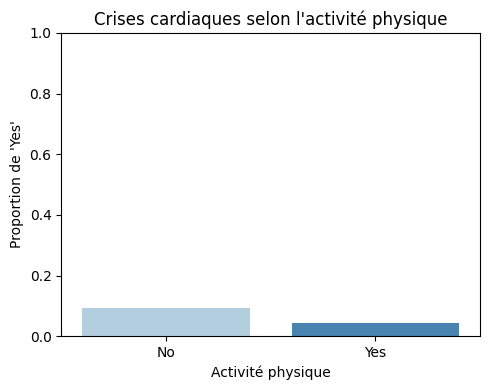

In [95]:
# Proportion de 'Yes' par activité physique
prop_pa = (
    df_clean.groupby("PhysicalActivities")["HadHeartAttack"]
    .value_counts(normalize=True)
    .unstack()
    .reset_index()
)

prop_pa_yes = prop_pa[["PhysicalActivities", "Yes"]]

# Visualisation
plt.figure(figsize=(5,4))
sns.barplot(data=prop_pa_yes, x="PhysicalActivities", y="Yes", palette="Blues")
plt.title("Crises cardiaques selon l'activité physique")
plt.ylabel("Proportion de 'Yes'")
plt.xlabel("Activité physique")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# Les personnes qui dorment moins de 6 heures par nuit ont un risque plus élevé de crise cardiaque.

/var/folders/2t/k0jf_rys24b897yq6hss2w200000gn/T/ipykernel_48115/3269677491.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("SleepCategory")


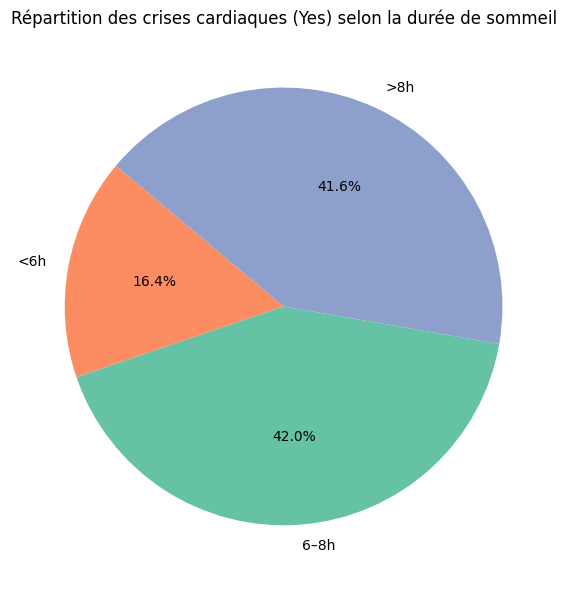

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# 🔷 Créer la catégorie de sommeil si pas déjà faite
bins = [0, 6, 8, 24]
labels = ["<6h", "6–8h", ">8h"]
df_clean["SleepCategory"] = pd.cut(
    df_clean["SleepHours"], bins=bins, labels=labels, right=False
)

# 🔷 Calculer le nombre (ou la proportion) de personnes avec HadHeartAttack=Yes
sleep_heart_yes = (
    df_clean[df_clean["HadHeartAttack"]=="Yes"]
    .groupby("SleepCategory")
    .size()
    .reindex(labels, fill_value=0)
)

# 🔷 Tracer le camembert
plt.figure(figsize=(6,6))
plt.pie(
    sleep_heart_yes,
    labels=sleep_heart_yes.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#fc8d62", "#66c2a5", "#8da0cb"]
)
plt.title("Répartition des crises cardiaques (Yes) selon la durée de sommeil")
plt.tight_layout()
plt.show()


# (clustering – mode de vie à risque)

Il existe des profils distincts de comportements à risque dans la population, que l'on peut regrouper à l’aide de KMeans sur des variables comme le tabac, l’alcool, le sommeil, l’activité physique et l’âge.
Segmenter la population pour identifier des groupes comme :

* Individus très à risque (fumeurs, buveurs, peu de sommeil, sédentaires)

* Profils “modérés” (ex-fumeurs, sommeil moyen, actifs)

* Profils sains (non-fumeurs, pas d’alcool, bon sommeil)

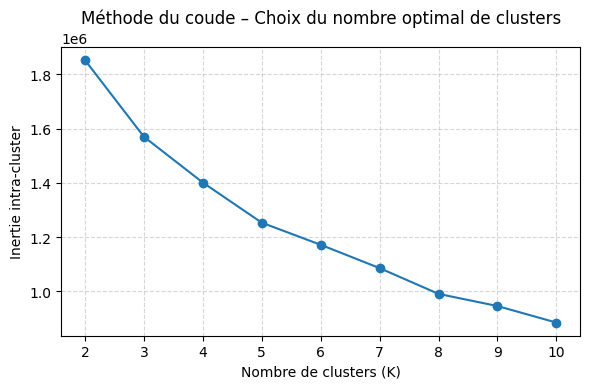

In [97]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 🎯 Sélection des variables
cols_cluster = [
    "SleepHours",
    "AlcoholDrinkers_nettoye",
    "SmokerStatus_nettoye",
    "ECigaretteUsage_nettoye",
    "PhysicalActivities_nettoye",
    "AgeCategory_nettoye"
]

# 🔷 On travaille sur le dataset propre
df_kmeans = df_clean[cols_cluster].dropna().copy()

# 🔷 Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans)

# 🔍 Méthode du coude
inertias = []
k_range = range(2, 11)  # petit bonus : aller jusqu’à 10
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# 🎨 Visualisation
plt.figure(figsize=(6,4))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude – Choix du nombre optimal de clusters")
plt.xlabel("Nombre de clusters (K)")
plt.ylabel("Inertie intra-cluster")
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [98]:
# Étape 3 – KMeans avec K=4
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df_kmeans["Cluster"] = clusters

In [99]:
# Colonnes originales pour interprétation plus lisible
cols_originales = [
    "AlcoholDrinkers",
    "SmokerStatus",
    "ECigaretteUsage",
    "PhysicalActivities",
    "AgeCategory"
]

# Moyennes des variables numériques (colonnes standardisées d'origine)
df_moyennes = (
    df_kmeans.groupby("Cluster")[cols_cluster]
    .mean()
    .round(2)
)

# Modalités les plus fréquentes (mode) pour les colonnes originales
df_qualitatives = df_clean.copy()
df_qualitatives = df_qualitatives.loc[df_kmeans.index].copy()
df_qualitatives["Cluster"] = df_kmeans["Cluster"].values

modes_par_cluster = (
    df_qualitatives.groupby("Cluster")[cols_originales]
    .agg(lambda x: x.mode().iloc[0])
)

# Fusion des deux résultats
df_interpretation = pd.concat([df_moyennes, modes_par_cluster], axis=1)

# Affichage final
from IPython.display import display
display(df_interpretation)


,SleepHours,AlcoholDrinkers_nettoye,SmokerStatus_nettoye,ECigaretteUsage_nettoye,PhysicalActivities_nettoye,AgeCategory_nettoye,AlcoholDrinkers,SmokerStatus,ECigaretteUsage,PhysicalActivities,AgeCategory
Cluster,,,,,,,,,,,
0,7.05,0.00,0.72,0.83,1.00,5.35,No,Never smoked,Never used e-cigarettes in my entire life,Yes,Age 65 to 69
1,7.04,1.00,0.77,0.80,1.00,5.79,Yes,Never smoked,Never used e-cigarettes in my entire life,Yes,Age 65 to 69
2,6.65,0.68,1.47,2.56,0.79,8.58,Yes,Former smoker,Use them some days,Yes,Age 18 to 24
3,7.05,0.38,1.03,0.80,0.00,4.77,No,Never smoked,Never used e-cigarettes in my entire life,No,Age 80 or older


In [100]:
# Étape 4 – Attribution des noms lisibles
cluster_labels = {
    0: "Actifs sociables",
    1: "Peu actifs, ex-fumeurs",
    2: "Profils à risque",
    3: "Profils très sains"
}
df_kmeans["ClusterLabel"] = df_kmeans["Cluster"].map(cluster_labels)


/var/folders/2t/k0jf_rys24b897yq6hss2w200000gn/T/ipykernel_48115/1920331899.py:39: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/homebrew/Caskroom/miniforge/base/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


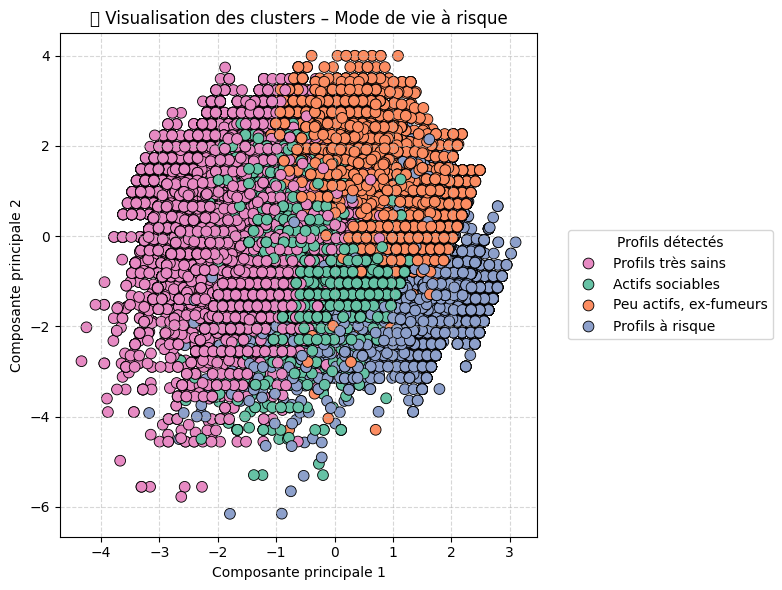

In [101]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Étape 5 – Réduction de dimension pour visualisation (PCA)
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_kmeans["PCA1"] = components[:, 0]
df_kmeans["PCA2"] = components[:, 1]

# 🎨 Étape 6 – Visualisation avec les noms & palette
palette_fix = {
    "Actifs sociables": "#66c2a5",
    "Peu actifs, ex-fumeurs": "#fc8d62",
    "Profils à risque": "#8da0cb",
    "Profils très sains": "#e78ac3"
}

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_kmeans,
    x="PCA1",
    y="PCA2",
    hue="ClusterLabel",
    palette=palette_fix,
    s=60,
    edgecolor='k'
)
plt.title("📊 Visualisation des clusters – Mode de vie à risque")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(
    title="Profils détectés",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5)
)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [102]:
df_clean["AgeCategory"].value_counts()

AgeCategory
Age 65 to 69       45633
Age 60 to 64       43067
Age 70 to 74       42103
Age 55 to 59       35708
Age 80 or older    35215
Age 50 to 54       32710
Age 75 to 79       31514
Age 40 to 44       29354
Age 35 to 39       28048
Age 45 to 49       27817
Age 18 to 24       26653
Age 30 to 34       25429
Age 25 to 29       21739
Name: count, dtype: int64